In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
%cd /Users/andrea/Documents/Github/MED_Fall

/Users/andrea/Documents/Github/MED_Fall


In [3]:
from dataset.scripts.template_match import TemplateMatch

In [4]:
video_path = '/Users/andrea/Documents/Github/MED_Fall/dataset/data/Actor_1_Bed_Full_PH CAM 8.mp4'

In [5]:
tm = TemplateMatch(video_path=video_path, templates_path='/Users/andrea/Documents/Github/MED_Fall/dataset/data/templates')

Found 10 templates in /Users/andrea/Documents/Github/MED_Fall/dataset/data/templates.
Total number of frames in the video: 4920


In [ ]:
timestamps, dataloggers = tm.extract_timestamps_dataloggers()

(1080, 1920, 3)


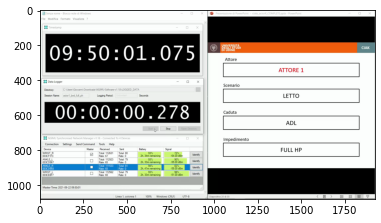

In [78]:
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
print(frame.shape)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame)

In [ ]:
img = frame[1:959, :]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

cnts = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for cnt in cnts:
    approx = cv2.contourArea(cnt)
    print(approx)

cv2.imshow('image', img)
cv2.imshow('Binary',thresh_img)
cv2.waitKey()

194698.0
106381.0


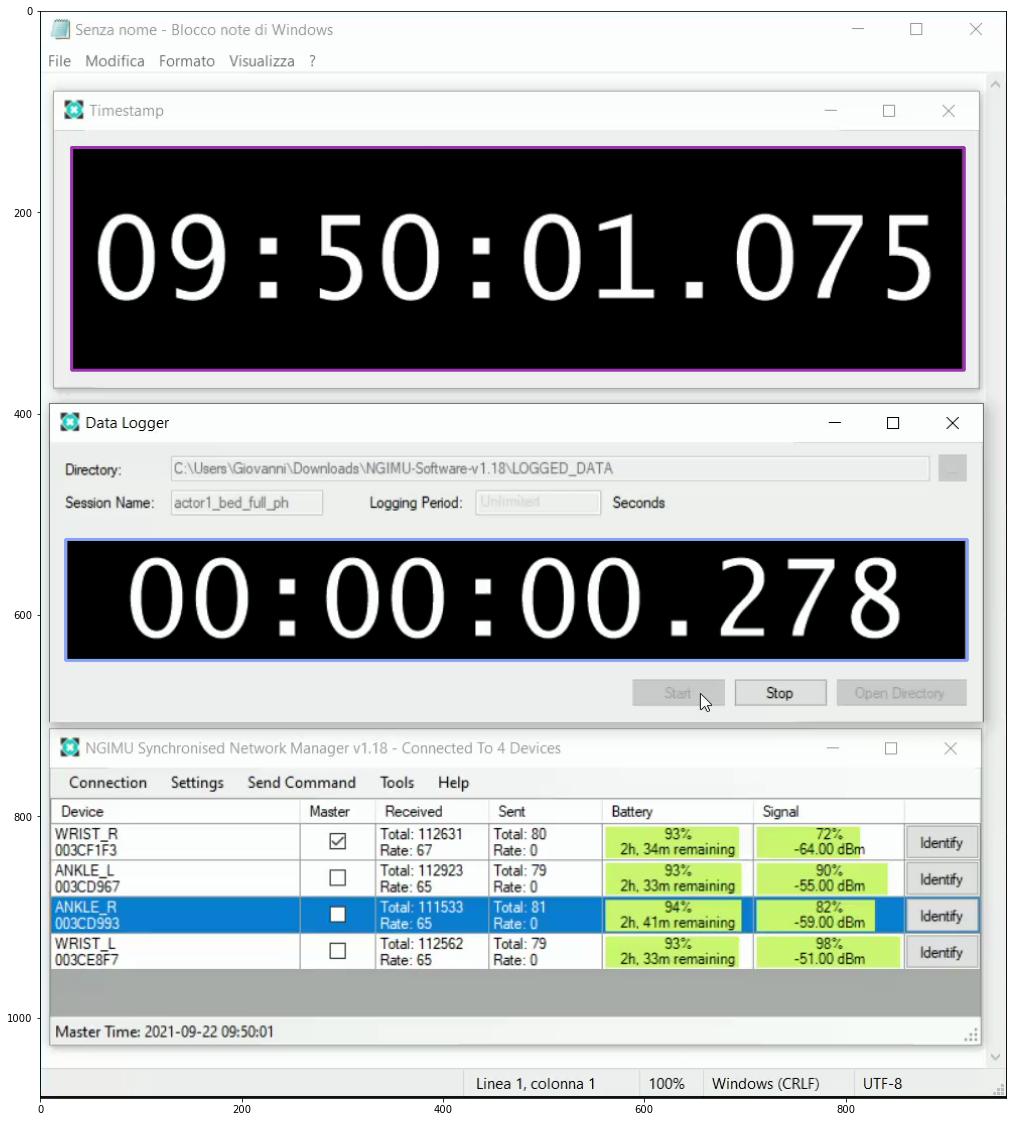

In [79]:
from random import randrange
img = frame[:, 0:960]
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

contours, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

d = {}
areas = []
bounding_rects = []
for cnt in contours:

    area = cv2.contourArea(cnt)
    bounding_rect = cv2.boundingRect(cnt)
    d[area] = bounding_rect

d_sorted = sorted(d, reverse=True)
areas = d_sorted[1:3]
for i in range(len(areas)):
    key = areas[i]
    print(key)
    (x,y,w,h) = d[key]
    cv2.rectangle(img, (x, y), (x + w, y + h), (randrange(0,255), randrange(0,255), randrange(0,255)), 2)

plt.figure(figsize=(30,20))
plt.imshow(img)


In [ ]:
#tm.pre_process_templates()
#tm.pre_process_templates()
tm.templates
tm.template_match(frame, element_type="datalogger", threshold=0.7)

In [ ]:
tm.template_match(frame, element_type="timestamp", test=True, threshold=0.6)